In [29]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import random
random.seed(67)

import numpy as np
np.random.seed(67)

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tsne import bh_sne
from sompy import SOMFactory
from sklearn.cluster import DBSCAN
from sompy.visualization.mapview import View2D
from sompy.visualization.umatrix import UMatrixView
from sompy.visualization.histogram import Hist2d

sns.set_style('white')
sns.set_context('notebook', font_scale=2)

In [30]:
df_train = pd.read_csv('../data/train_data.csv')
df_valid = pd.read_csv('../data/valid_data.csv')
df_test = pd.read_csv('../data/test_data.csv')

feature_cols = list(df_train.columns[:-1])
target_col = df_train.columns[-1]

In [31]:
X_train = df_train[feature_cols].values
y_train = df_train[target_col].values

X_valid = df_valid[feature_cols].values
y_valid = df_valid[target_col].values

# X_test = df_test[feature_cols].values

In [83]:
sm = SOMFactory.build(X_train, mapsize=[30, 30])
sm.train()

 Training...
 pca_linear_initialization took: 0.053000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.586000, quantization error: 3.237630

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.583000, quantization error: 3.240340

 Final quantization error: 3.240340
 train took: 1.228000 seconds


In [109]:
bmu = sm.find_bmu(X_valid)
bmu[1].shape

(9632,)

In [85]:
sm.component_names

array([['Variable-1', 'Variable-2', 'Variable-3', 'Variable-4',
        'Variable-5', 'Variable-6', 'Variable-7', 'Variable-8',
        'Variable-9', 'Variable-10', 'Variable-11', 'Variable-12',
        'Variable-13', 'Variable-14', 'Variable-15', 'Variable-16',
        'Variable-17', 'Variable-18', 'Variable-19', 'Variable-20',
        'Variable-21']], 
      dtype='|S11')

In [115]:
xy = sm.bmu_ind_to_xy(bmu[0])
xy

array([[ 16,   9, 489],
       [ 14,  12, 432],
       [ 11,  12, 342],
       ..., 
       [ 17,  15, 525],
       [ 15,  13, 463],
       [ 15,  13, 463]])

In [117]:
projection = sm.project_data(X_valid)
projection

(9632,)

In [101]:
sm.predict_by(X_train[:,:-1], y_train[:,-1:])

IndexError: too many indices for array

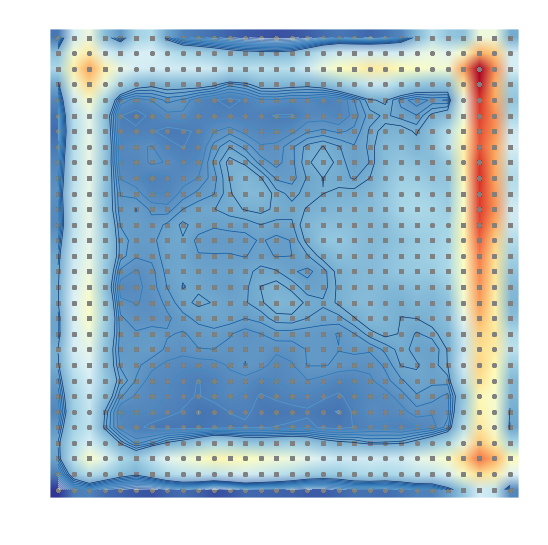

In [96]:
v = UMatrixView(8, 8, 'SOM', cmap='viridis')
v.show(sm);

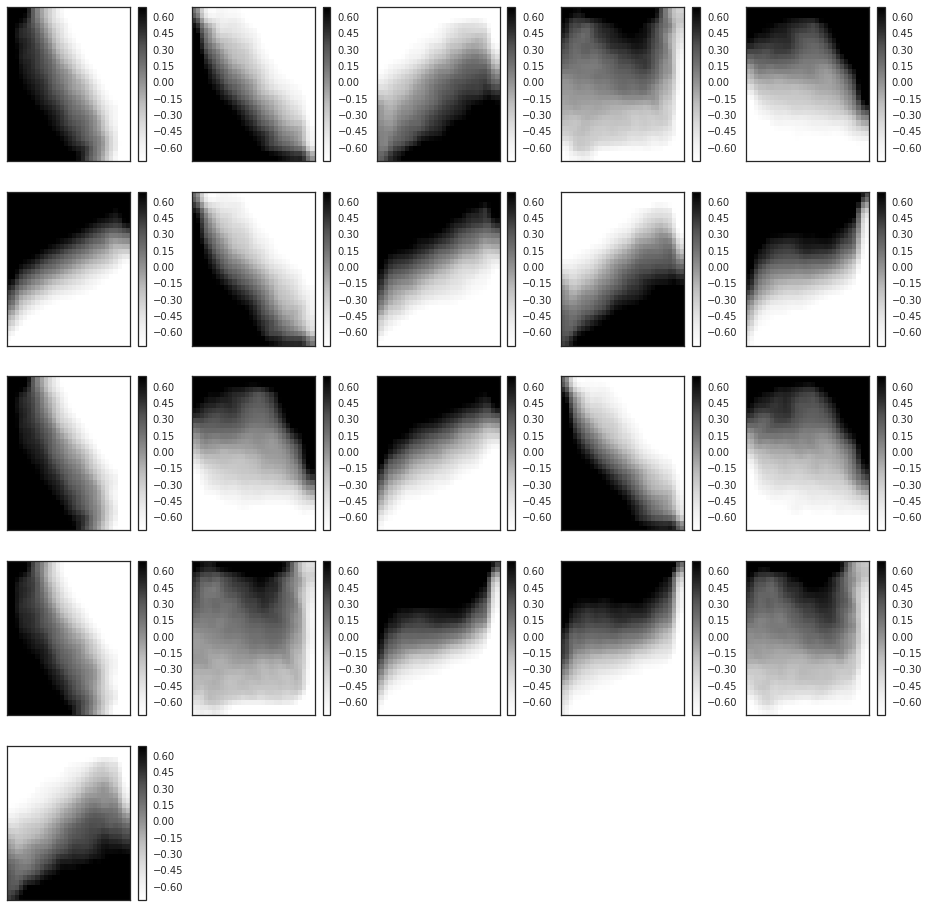

In [89]:
v = View2D(8, 8, 'SOM', cmap='viridis')
v.prepare()
v.show(sm, col_sz=5, cmap='viridis')

In [32]:
tsne_data = np.load('../data/tsne_2d_30p.npz')
tsne_train = tsne_data['train']
tsne_valid = tsne_data['valid']
tsne_test = tsne_data['test']
tsne_all = np.concatenate([tsne_train, tsne_valid, tsne_test], axis=0)

In [33]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=None)
dbscan_all = dbscan.fit_predict(tsne_all)

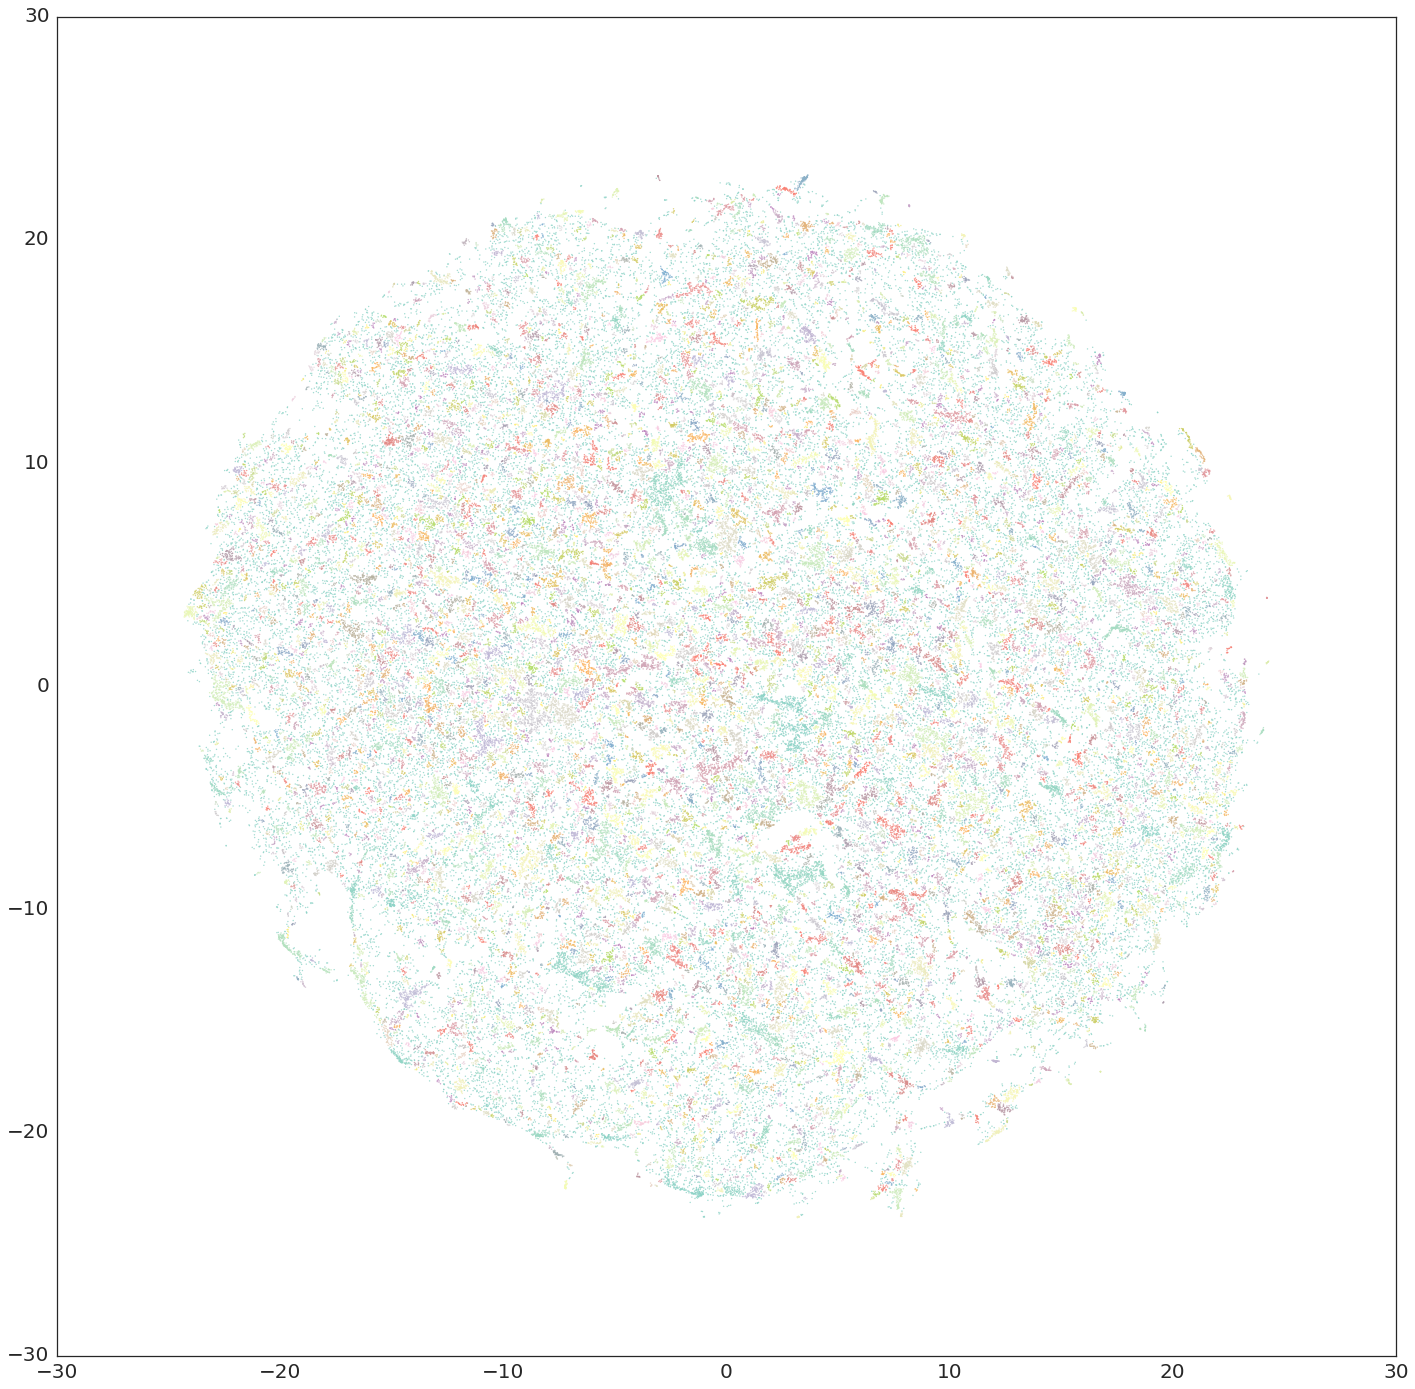

In [38]:
fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(tsne_all[:,0], tsne_all[:,1], c=dbscan_all, cmap='Set3', s=8, alpha=0.8, marker='.', lw=0)

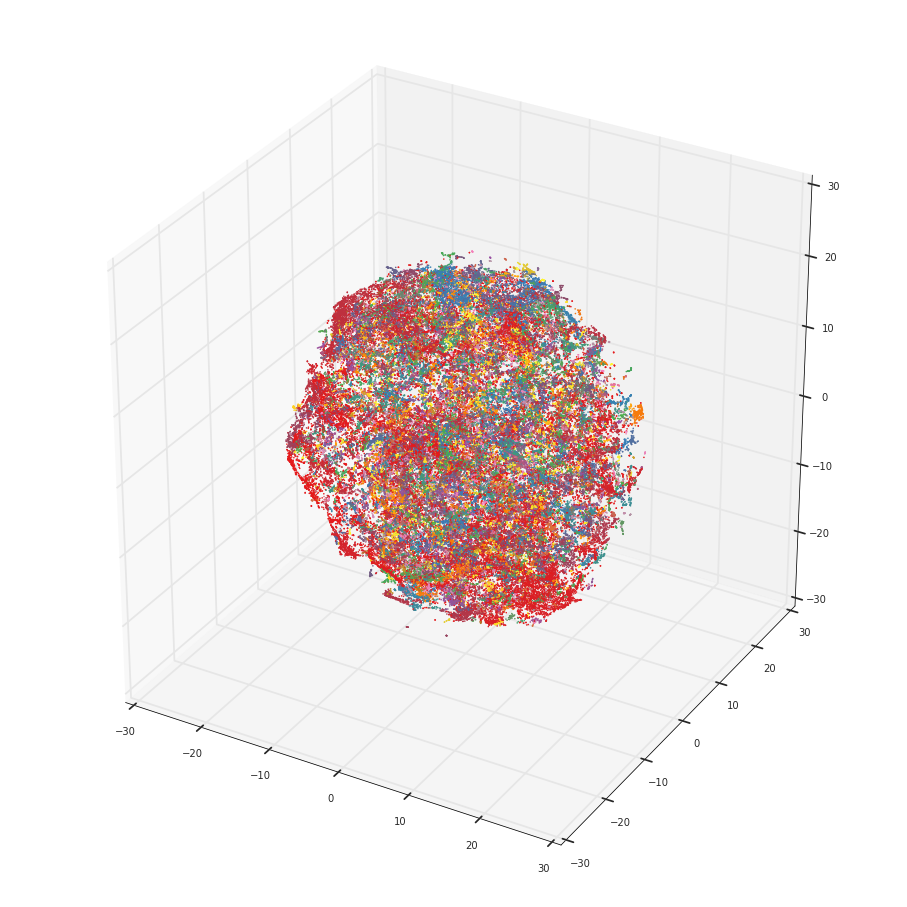

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_all[:,0], tsne_all[:,1], tsne_all[:,2], c=dbscan_all, cmap='Set1', s=10, alpha=1.0, marker='.', lw=0, depthshade=True)

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go

idx = np.random.choice(len(tsne_all), 10000)
trace = go.Scatter3d(
    x=tsne_all[idx,0],
    y=tsne_all[idx,1],
    z=tsne_all[idx,2],
    mode='markers',
    marker=dict(
        size=4,
        color=dbscan_all[idx],
        colorscale='viridis',
        opacity=0.8
    )
)

py.iplot([trace])

Starting new HTTPS connection (1): plot.ly
/home/jim/.envs/env/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.

"POST /clientresp HTTP/1.1" 200 118
